In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
# Scikit-learn é uma biblioteca popular de código aberto em Python para aprendizado de máquina.Ele fornece uma ampla gama de algoritmos de aprendizado
# supervisionado e não supervisionado, além de utilitários para pré-processamento de dados, seleção de modelos, avaliação de desempenho e muito mais.

In [58]:
df = pd.read_csv("/content/CHURN_CREDIT_MOD14_cleaned.csv", delimiter=',')

df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,1011688.0,0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,1011688.0,0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,1011688.0,0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,1011688.0,0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,1011688.0,0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,1011688.0,0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,1011688.0,1
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,1011688.0,0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,1011688.0,0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,1011688.0,0


In [59]:
# 1.Matriz Correlação
df.select_dtypes(include=['number']).corr()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
Credit_Score,1.000000,-0.005099,-0.000722,0.006771,0.012504,-0.000867,0.011410,-0.011701,-0.024581
Idade,-0.005099,1.000000,-0.013734,0.063713,-0.103867,-0.012933,0.000577,0.283716,0.345462
Tempo_Credito,-0.000722,-0.013734,1.000000,-0.009711,0.006241,0.003512,-0.003606,0.001711,-0.018701
Balanco,0.006771,0.063713,-0.009711,1.000000,-0.359285,-0.017786,-0.013229,-0.162824,0.129644
Qtd_Produtos,0.012504,-0.103867,0.006241,-0.359285,1.000000,0.001866,0.039583,-0.000525,-0.211723
Possui_Cartao,-0.000867,-0.012933,0.003512,-0.017786,0.001866,1.000000,-0.024557,0.006237,-0.021421
Membro_Ativo,0.011410,0.000577,-0.003606,-0.013229,0.039583,-0.024557,1.000000,-0.000228,-0.210880
Salario_Anual,-0.011701,0.283716,0.001711,-0.162824,-0.000525,0.006237,-0.000228,1.000000,0.031905
Churn,-0.024581,0.345462,-0.018701,0.129644,-0.211723,-0.021421,-0.210880,0.031905,1.000000


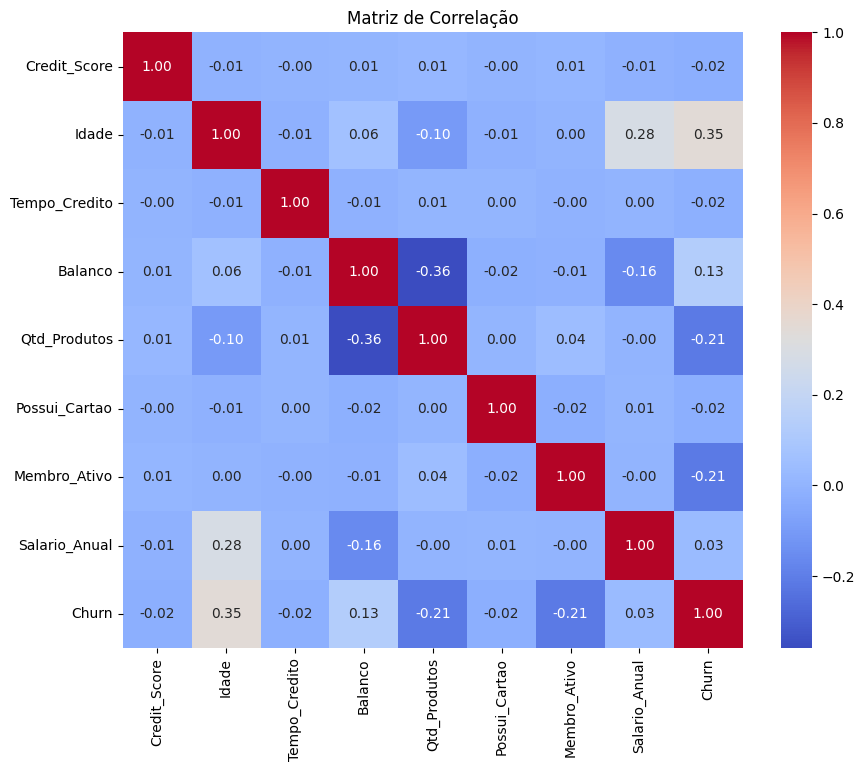

In [60]:
# 2.Cluster Map:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

#Atributos Categóricos

Para variáveis categóricas como "Pais", onde não há uma relação de ordem natural entre as categorias, é geralmente melhor usar One-Hot Encoding para evitar confusão no modelo.

Para variáveis como "Sexo" ou "Gênero", onde normalmente existem apenas duas categorias ("Masculino" e "Feminino"), a escolha entre Label Encoding e One-Hot Encoding pode depender de alguns fatores.



#Label Encoding Prós:

Simples de implementar. Economiza memória, pois usa apenas uma coluna para representar a variável.

#One-Hot Encoding Prós:

Evita qualquer suposição de ordem entre os valores. Pode ser interpretado de maneira mais neutra pelo modelo, sem implicações de ordem.

In [61]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Genero" - ideal
df['Genero_encoded'] = label_encoder.fit_transform(df['Genero'])

# Aplicar o One Hot para a coluna "Pais" - Nesse caso não criamos instância
df = pd.get_dummies(df, columns=['Pais'], prefix='Pais', drop_first=True)
#pd.get_dummies(df, columns=['Pais'], prefix='Pais'): Esta função transforma a coluna "Pais" em várias colunas binárias (one-hot encoded)

print(df)

       Credit_Score  Genero  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               677    Male   18.0              5  134796.87             2   
1               644  Female   18.0              7       0.00             1   
2               641    Male   18.0              1       0.00             2   
3               826    Male   18.0              2       0.00             2   
4               774  Female   18.0              1  185891.54             1   
...             ...     ...    ...            ...        ...           ...   
99896           628    Male   83.0              8   56214.85             2   
99897           543    Male   92.0              6       0.00             2   
99898           752    Male   92.0              1  126076.24             2   
99899           820    Male   92.0              0       0.00             2   
99900           696    Male   92.0              9       0.00             1   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Churn  Gener

In [62]:
df.dtypes

,0
Credit_Score,int64
Genero,object
Idade,float64
Tempo_Credito,int64
Balanco,float64
Qtd_Produtos,int64
Possui_Cartao,float64
Membro_Ativo,float64
Salario_Anual,float64
Churn,int64


In [63]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
print(df)

       Credit_Score  Genero  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               677    Male   18.0              5  134796.87             2   
1               644  Female   18.0              7       0.00             1   
2               641    Male   18.0              1       0.00             2   
3               826    Male   18.0              2       0.00             2   
4               774  Female   18.0              1  185891.54             1   
...             ...     ...    ...            ...        ...           ...   
99896           628    Male   83.0              8   56214.85             2   
99897           543    Male   92.0              6       0.00             2   
99898           752    Male   92.0              1  126076.24             2   
99899           820    Male   92.0              0       0.00             2   
99900           696    Male   92.0              9       0.00             1   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Churn  Gener

In [64]:
# Vamos dropar as colunas com os atributos categóricos
df = df.drop(['Genero'], axis=1)
print(df)

       Credit_Score  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               677   18.0              5  134796.87             2   
1               644   18.0              7       0.00             1   
2               641   18.0              1       0.00             2   
3               826   18.0              2       0.00             2   
4               774   18.0              1  185891.54             1   
...             ...    ...            ...        ...           ...   
99896           628   83.0              8   56214.85             2   
99897           543   92.0              6       0.00             2   
99898           752   92.0              1  126076.24             2   
99899           820   92.0              0       0.00             2   
99900           696   92.0              9       0.00             1   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Churn  Genero_encoded  \
0                1.0           0.0      1011688.0      0               1   
1      

Podemos inclusive trazer a correlação dessas duas colunas, agora que não são mais atributos categóricos

In [65]:
df.corr()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn,Genero_encoded,Pais_GERMANY,Pais_SPAIN
Credit_Score,1.000000,-0.005099,-0.000722,0.006771,0.012504,-0.000867,0.011410,-0.011701,-0.024581,0.001853,0.002700,0.007747
Idade,-0.005099,1.000000,-0.013734,0.063713,-0.103867,-0.012933,0.000577,0.283716,0.345462,-0.062781,0.094204,-0.006409
Tempo_Credito,-0.000722,-0.013734,1.000000,-0.009711,0.006241,0.003512,-0.003606,0.001711,-0.018701,0.008698,-0.007614,0.005917
Balanco,0.006771,0.063713,-0.009711,1.000000,-0.359285,-0.017786,-0.013229,-0.162824,0.129644,-0.015721,0.538036,-0.131648
Qtd_Produtos,0.012504,-0.103867,0.006241,-0.359285,1.000000,0.001866,0.039583,-0.000525,-0.211723,0.023692,-0.102711,0.027801
Possui_Cartao,-0.000867,-0.012933,0.003512,-0.017786,0.001866,1.000000,-0.024557,0.006237,-0.021421,0.006172,-0.008131,-0.015237
Membro_Ativo,0.011410,0.000577,-0.003606,-0.013229,0.039583,-0.024557,1.000000,-0.000228,-0.210880,0.035471,-0.034253,0.017284
Salario_Anual,-0.011701,0.283716,0.001711,-0.162824,-0.000525,0.006237,-0.000228,1.000000,0.031905,-0.008335,-0.297872,-0.305720
Churn,-0.024581,0.345462,-0.018701,0.129644,-0.211723,-0.021421,-0.210880,0.031905,1.000000,-0.146475,0.214479,-0.051270
Genero_encoded,0.001853,-0.062781,0.008698,-0.015721,0.023692,0.006172,0.035471,-0.008335,-0.146475,1.000000,-0.044393,0.009969


#Separação entre base treino e teste

Separar a base de dados em conjuntos de treino e teste é importante para avaliar o desempenho de um modelo de aprendizado de máquina de forma justa e confiável. Aqui estão algumas razões pelas quais essa separação é crucial:

**Avaliação do desempenho do modelo:** Ao separar os dados em treino e teste, podemos treinar o modelo nos dados de treinamento e avaliar seu desempenho nos dados de teste. Isso nos permite entender como o modelo generaliza para novos dados não vistos durante o treinamento.

**Prevenção de overfitting:** A separação dos dados ajuda a evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para novos dados. Avaliar o modelo em um conjunto de dados de teste separado pode revelar se ele está sobreajustado aos dados de treinamento.

overfitting é um fenômeno comum em modelos de aprendizado de máquina, onde o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados que não foram vistos durante o treinamento. Isso significa que o modelo "decora" os dados de treinamento em vez de aprender os padrões subjacentes que podem ser aplicados a novos dados.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Separar os dados em features (X) e o alvo (y)
X = df.drop('Churn', axis=1)  # Considerando que 'Churn' é a coluna a ser predita
y = df['Churn']

In [68]:
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O parâmetro 'test_size' determina a proporção dos dados que serão separados para teste (25% neste exemplo)
# O parâmetro 'random_state' é usado para garantir que a divisão seja reproduzível

In [69]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_GERMANY,Pais_SPAIN
43207,618,21.0,3,125682.79,1,0.0,0.0,1011688.0,0,0,0
8282,706,35.0,9,0.00,2,1.0,1.0,1011688.0,1,0,1
10972,628,37.0,5,0.00,1,1.0,0.0,1011688.0,0,0,1
21482,633,63.0,6,114552.60,1,1.0,0.0,1011688.0,0,0,1
85051,745,41.0,8,0.00,2,1.0,0.0,5752771.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6265,815,33.0,2,0.00,2,1.0,1.0,1011688.0,0,0,1
54886,749,31.0,4,188241.05,1,0.0,1.0,1011688.0,1,0,0
76820,640,38.0,2,84496.71,1,1.0,1.0,15013539.0,0,0,0
860,704,25.0,2,0.00,1,1.0,1.0,1011688.0,0,0,1


In [70]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_GERMANY,Pais_SPAIN
80777,752,39.0,6,0.00,2,1.0,0.0,240126.0,1,0,0
2527,698,29.0,6,0.00,2,1.0,0.0,1011688.0,1,0,1
36291,584,43.0,3,126473.33,1,0.0,0.0,1011688.0,1,1,0
67601,705,35.0,1,0.00,2,0.0,0.0,6633101.0,1,0,0
24390,850,30.0,10,132571.67,2,1.0,0.0,1011688.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1916,479,28.0,8,106089.30,1,0.0,1.0,1011688.0,1,0,1
71037,742,36.0,1,0.00,2,1.0,0.0,16762118.0,0,0,0
38611,619,47.0,1,116968.91,1,1.0,1.0,1011688.0,0,1,0
94341,516,49.0,6,0.00,2,1.0,0.0,12294996.0,1,0,0


In [71]:
y_train

,Churn
43207,1
8282,0
10972,0
21482,1
85051,0
...,...
6265,0
54886,0
76820,0
860,0


In [72]:
y_test

,Churn
80777,0
2527,0
36291,1
67601,0
24390,0
...,...
1916,0
71037,0
38611,1
94341,0


In [73]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (74925, 11)
Tamanho de X_test: (24976, 11)
Tamanho de y_train: (74925,)
Tamanho de y_test: (24976,)


#Balanceamento dos dados - Smote

A primeira etapa é verificarmos como está o balanceamento da nossa variavel preditora, no caso, Churn.

Pois caso uma das classes esteja em baixa quantidade nosso modelo futuramente pode ter dificuldade para prever essa classe.

Churn
0    78.883094
1    21.116906
Name: proportion, dtype: float64


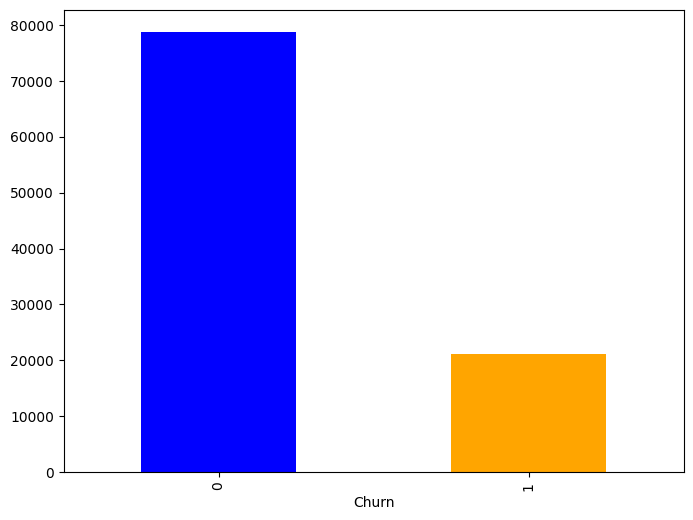

In [74]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])

# Calcular e imprimir as porcentagens dos valores na coluna 'churn'
print((df['Churn'].value_counts(normalize=True) * 100))

Temos apenas 20% dos dados classificados como Churn e faz sentido o número de clientes que abandonaram a marca ser menor.
Entretanto isso pode indicar que se nosso modelo simplesmente "chutasse" que todos nossos clientes não dariam churn ele acertaria 80% dos casos e seria bem avaliado. Porém esse valor não é real para nós, pois nos interessa acertar o churn, por conta disso é interessante balancearmos nossos dados em casos como esses.

Idealmente aplicamos o balanceamento apenas na base de treino, em alguns casos podemos aplicar no teste mas imagine que, na vida real, quando nosso modelo for lidar com dados reais eles não estarão balanceados, então usaremos o balanceamento apenas no teste a nível de aprendizazdo do modelo.

In [75]:
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# eliminando filas com dados faltantes
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Churn
1    59062
0    59062
Name: count, dtype: int64


In [76]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
Churn
1    59062
0    59062
Name: count, dtype: int64


In [77]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [78]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [79]:
y_test.to_csv('y_test.csv', index=False)

In [80]:
X_test.to_csv('X_test.csv', index=False)